In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
env_to_label ={
    'Trading-v0': 'Trading',
    'RaceStrategy': 'RaceStrategy'
}

In [22]:
budget = 1000
sample_size = 20
env = "Trading-v0"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
df['type'] = ["pf"]*df.shape[0]

temp = pd.DataFrame(columns=df.columns)

for p in particles:
    res = df.loc[df['agent'] == str(p)+'_pf', ][:sample_size]
    temp = pd.concat([temp, res])

df = temp
df

,agent,total_reward,discounted_reward,length,budget,type
0,2_pf,10.000000,10.000000,20,1000,pf
1,2_pf,9.567206,9.567206,20,1000,pf
2,2_pf,10.605143,10.605143,20,1000,pf
3,2_pf,8.580035,8.580035,20,1000,pf
4,2_pf,8.525309,8.525309,20,1000,pf
...,...,...,...,...,...,...
195,20_pf,8.025620,8.025620,20,1000,pf
196,20_pf,8.998396,8.998396,20,1000,pf
197,20_pf,10.336953,10.336953,20,1000,pf
198,20_pf,9.269701,9.269701,20,1000,pf


In [24]:
df_dpw = pd.read_csv("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw = df_dpw[:sample_size]
print("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw

Trading-v0/dpw_1000/dpw_mcts_only_Trading-v0_1000_data_exp_0.csv


,agent,total_reward,discounted_reward,length,budget,type
0,dpw,10.588258,9.720416,20,1000,dpw


In [13]:
df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
label = env_to_label[env]
df2 = df2[df2['env']==label]
df2['type'] = ["paper"]*df2.shape[0]
df2

,env,agent,budget,seed,total_reward,return,length,pit_count,type
159,RaceStrategy,deterministic,1000,314590776,7.282747,6.632761,20,3,paper
52,RaceStrategy,deterministic,1000,314590758,7.260769,6.614167,20,2,paper
55,RaceStrategy,deterministic,1000,314590757,7.350040,6.691252,20,3,paper
56,RaceStrategy,deterministic,1000,314590760,7.290690,6.640215,20,3,paper
137,RaceStrategy,deterministic,1000,314590769,7.277580,6.622997,20,2,paper
...,...,...,...,...,...,...,...,...,...
84,RaceStrategy,random,1000,314590771,6.924987,6.286305,20,6,paper
75,RaceStrategy,random,1000,314590769,6.813775,6.216539,20,7,paper
62,RaceStrategy,random,1000,314590768,6.942725,6.330863,20,7,paper
58,RaceStrategy,random,1000,314590767,6.985989,6.365244,20,4,paper


In [17]:
temp = pd.DataFrame(columns=df2.columns)

for agent in df2["agent"].unique():
    res = df2.loc[df2['agent'] == agent, ][:sample_size]
    temp = pd.concat([temp, res])
    
df2 = temp

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")

df3

,agent,total_reward,discounted_reward,length,budget,pit_count,type,env,seed,return
89,10_pf,7.296926,7.296926,20,1000,2,pf,NaN,NaN,NaN
97,10_pf,7.242609,7.242609,20,1000,2,pf,NaN,NaN,NaN
96,10_pf,7.231495,7.231495,20,1000,3,pf,NaN,NaN,NaN
95,10_pf,7.223919,7.223919,20,1000,2,pf,NaN,NaN,NaN
94,10_pf,7.176014,7.176014,20,1000,3,pf,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
276,random,6.813775,NaN,20,1000,7,paper,RaceStrategy,314590769,6.216539
277,random,6.942725,NaN,20,1000,7,paper,RaceStrategy,314590768,6.330863
278,random,6.985989,NaN,20,1000,4,paper,RaceStrategy,314590767,6.365244
271,random,6.875196,NaN,20,1000,5,paper,RaceStrategy,314590766,6.262320


Saving total_reward plot to RaceStrategy/racestrategy_total_reward_1000.png


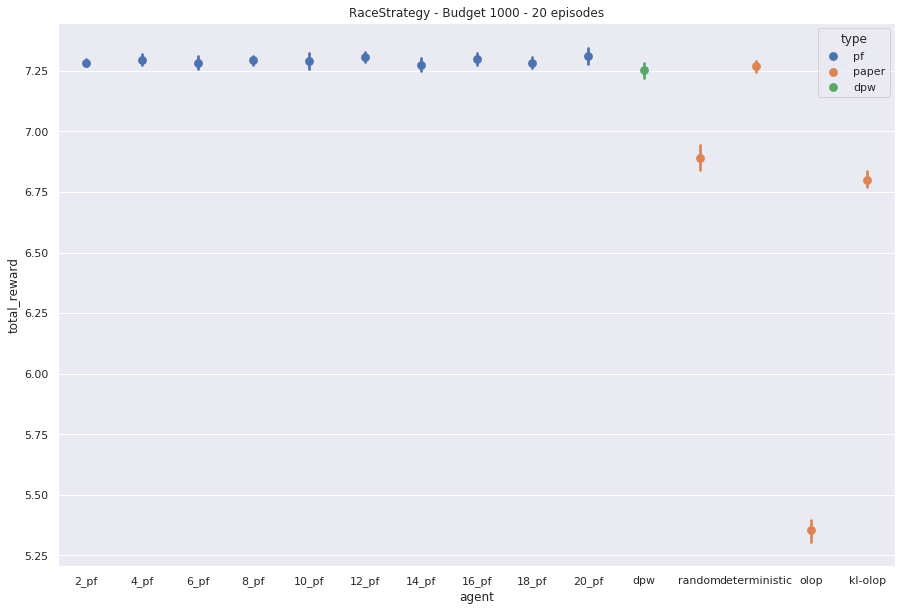

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                    order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])

plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))


field_path = "{}/{}_total_reward_{}.png".format(env, env.lower(), budget)
plot.get_figure().savefig(field_path, bbox_inches='tight')
print("Saving total_reward plot to {}".format(field_path))

Saving pit_count plot to RaceStrategy/racestrategy_pit_count_1000.png


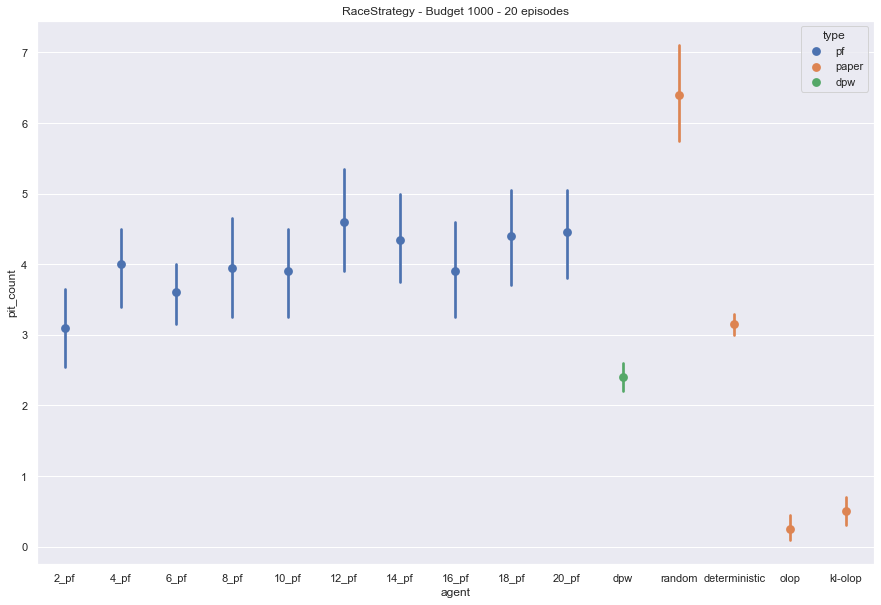

In [8]:
if env == "RaceStrategy":
    plt.figure(figsize=(15, 10))


    plot = sns.pointplot(x="agent", y="pit_count", data=df3, hue="type", legend=False, join=False,
                            order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
    #plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)

    plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))


    field_path = "{}/{}_pit_count_{}.png".format(env, env.lower(), budget)
    plot.get_figure().savefig(field_path, bbox_inches='tight')
    # plt.show()
    print("Saving pit_count plot to {}".format(field_path))

Saving total_reward plot to Trading-v0/trading-v0_total_reward_1000.png
Saving total_reward plot to Trading-v0/trading-v0_total_reward_10000.png
Saving total_reward plot to RaceStrategy/racestrategy_total_reward_1000.png
Saving total_reward plot to RaceStrategy/racestrategy_total_reward_10000.png


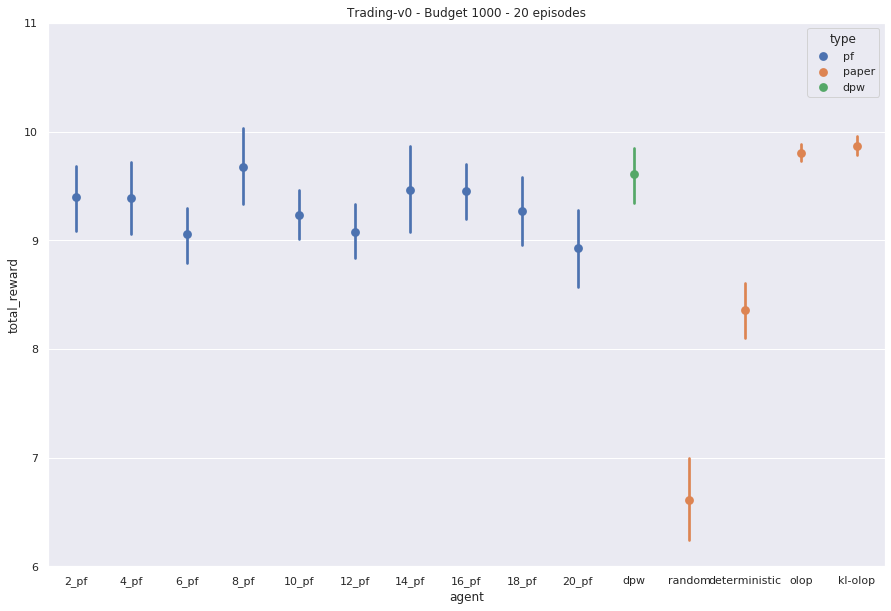

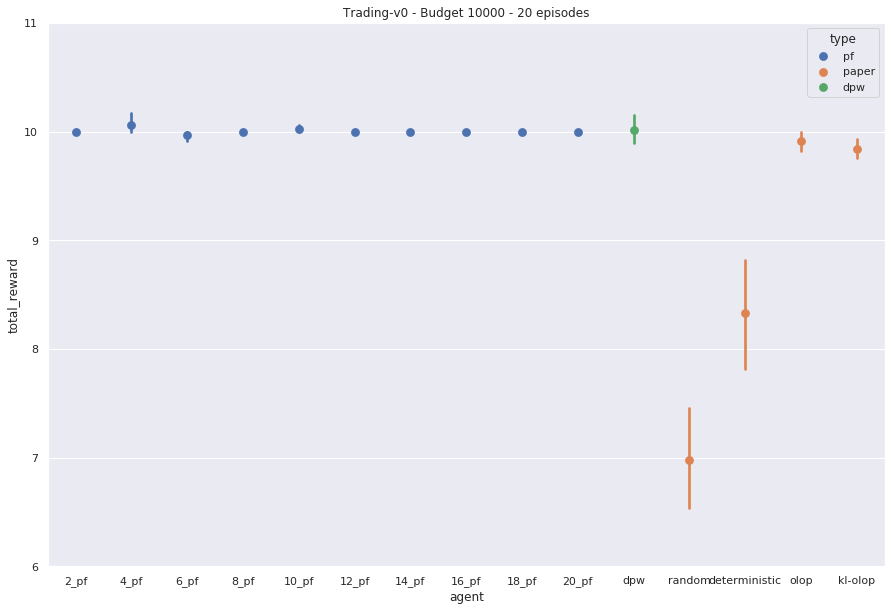

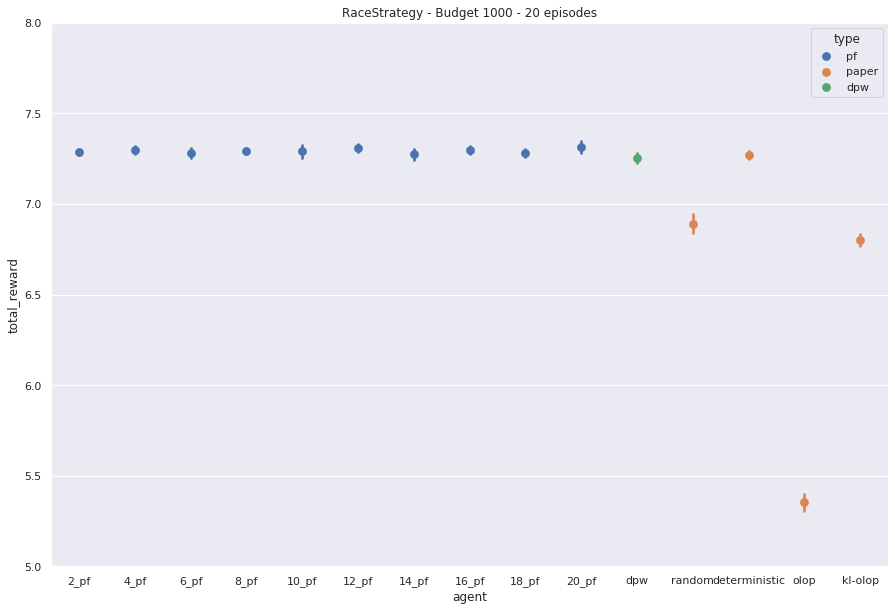

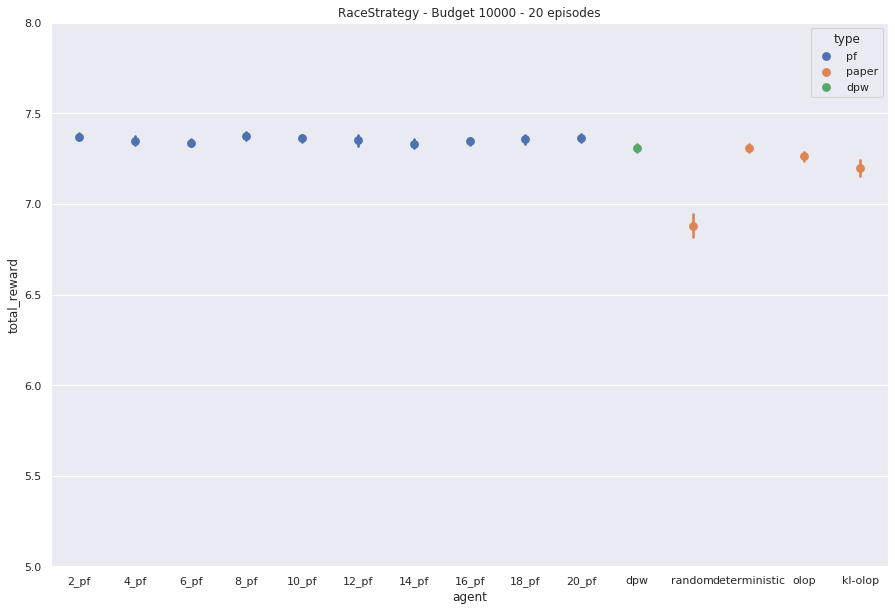

In [4]:
envs = ['Trading-v0', 'RaceStrategy']
budgets = [1000, 10000]
limits = [(6,11), (5,8)]
particles = [2,4,6,8,10,12,14,16,18,20]
sample_size = 20

for i, env in enumerate(envs):
    for j, budget in enumerate(budgets):
        #read ours
        df = pd.read_csv("{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
        df['type'] = ["pf"]*df.shape[0]
        temp = pd.DataFrame(columns=df.columns)
        for p in particles:
            res = df.loc[df['agent'] == str(p)+'_pf', ][:sample_size]
            temp = pd.concat([temp, res])
        df = temp
        #read dpw
        df_dpw = pd.read_csv("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
        df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
        df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
        df_dpw = df_dpw[:sample_size]
        #read olop, deterministic
        df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
        df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
        df2 = df2.sort_values(by="agent")
        label = env_to_label[env]
        df2 = df2[df2['env']==label]
        df2 = df2[df2['budget']==budget]
        df2['type'] = ["paper"]*df2.shape[0]
        
        #merge the datasets 
        
        temp = pd.DataFrame(columns=df2.columns)
        for agent in df2["agent"].unique():
            res = df2.loc[df2['agent'] == agent, ][:sample_size]
            temp = pd.concat([temp, res])
        df2 = temp
        df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
        df3 = df3.sort_values(by="agent")
        #plot the data
        sns.set(style="darkgrid")
        plt.figure(figsize=(15, 10))
        plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                            order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])

        plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))
        field_path = "{}/{}_total_reward_{}.png".format(env, env.lower(), budget)
        plt.ylim(limits[i])
        
        plot.get_figure().savefig(field_path, bbox_inches='tight')
        print("Saving total_reward plot to {}".format(field_path))

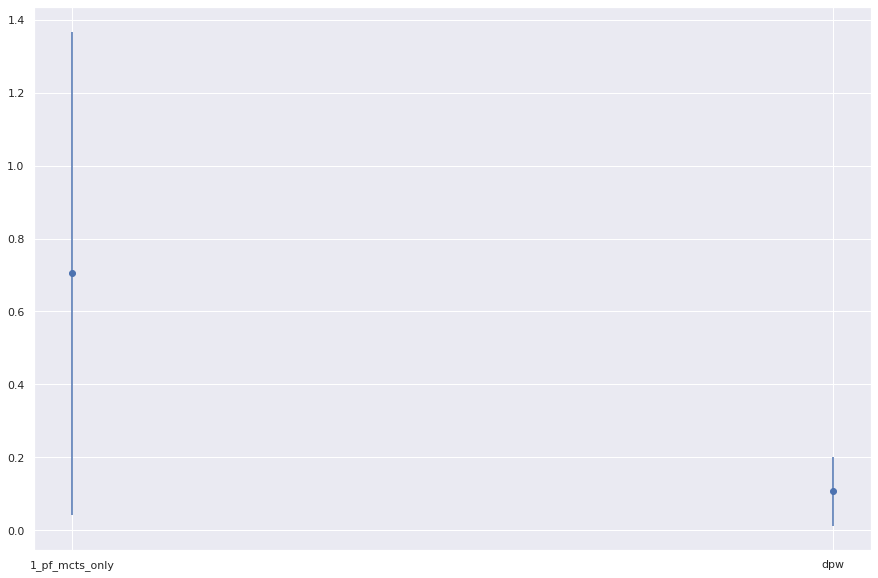

In [22]:
env = 'riverswim'
budget = 1000
df = pd.read_csv("{}/1_pf_mcts_only_RiverSwim-continuous_300000_data_exp_0.csv".format(env))
df['type'] = ["pf"]*df.shape[0]
temp = pd.DataFrame(columns=df.columns)
res = df.loc[df['agent'] == "1_pf_mcts_only"]
temp = pd.concat([temp, res])
df = temp
#read dpw
df_dpw = pd.read_csv("{}/dpw_mcts_only_RiverSwim-continuous_300000_data_exp_0.csv".format(env))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw = df_dpw[:sample_size]

df3 = pd.concat([df, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")
#plot the data
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
# plt
# # plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
# #                     order=["1_pf_mcts_only", "dpw",])
# plot = sns.boxplot(x="agent", y="total_reward", data=df3, hue="type", 
#                     order=["1_pf_mcts_only", "dpw",])
data = [y for _, y in df3.groupby('agent', as_index=False)]
x = []
y = []
errors = []
for d in data:
    x.append(d['agent'].to_numpy()[0])
    y.append(np.mean(d['total_reward'].to_numpy()))
    errors.append(np.std(d['total_reward'].to_numpy()) / np.sqrt(d.shape[0]))
plt.errorbar(x, y, yerr=errors, fmt='o')
plot.set_title("{} - Budget {} - {} episodes".format(env, budget, sample_size))
field_path = "{}/{}_total_reward_{}.png".format(env, env.lower(), budget)
# plt.ylim((-1,2))

# plot.get_figure().savefig(field_path, bbox_inches='tight')
# print("Saving total_reward plot to {}".format(field_path))